In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [25]:
tracks = pd.read_csv('/kaggle/input/music-data/dataset.csv')
tracks.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [26]:
tracks.shape


(114000, 21)

In [27]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [28]:
tracks.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [29]:
tracks.dropna(inplace = True)

In [30]:
tracks.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [31]:
tracks = tracks.drop(['track_id','time_signature','album_name','explicit'], axis = 1)

In [32]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   artists           113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   danceability      113999 non-null  float64
 6   energy            113999 non-null  float64
 7   key               113999 non-null  int64  
 8   loudness          113999 non-null  float64
 9   mode              113999 non-null  int64  
 10  speechiness       113999 non-null  float64
 11  acousticness      113999 non-null  float64
 12  instrumentalness  113999 non-null  float64
 13  liveness          113999 non-null  float64
 14  valence           113999 non-null  float64
 15  tempo             113999 non-null  float64
 16  track_genre       113999 

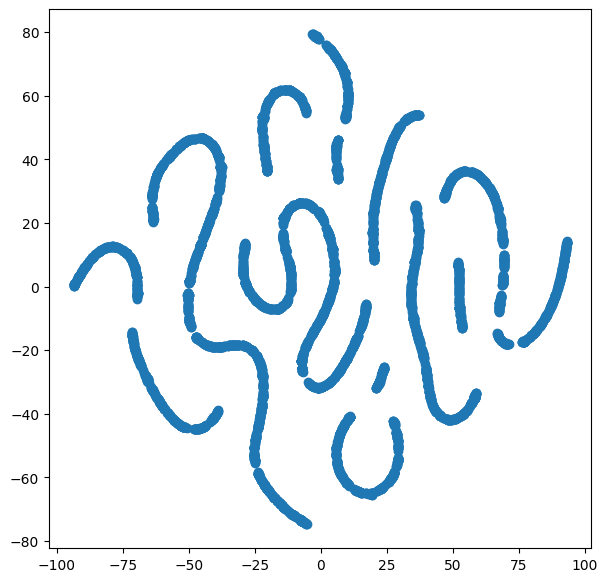

In [33]:
numerical_features = tracks.select_dtypes(include=['number']).drop('Unnamed: 0', axis=1)

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(numerical_features.head(5000)) #Use the numerical features

plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [34]:
tracks['track_name'].nunique(), tracks.shape

(73608, (113999, 17))

In [35]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

In [36]:
floats = []
for col in tracks.columns:
   if tracks[col].dtype == 'float':
       floats.append(col)
	
len(floats)


9

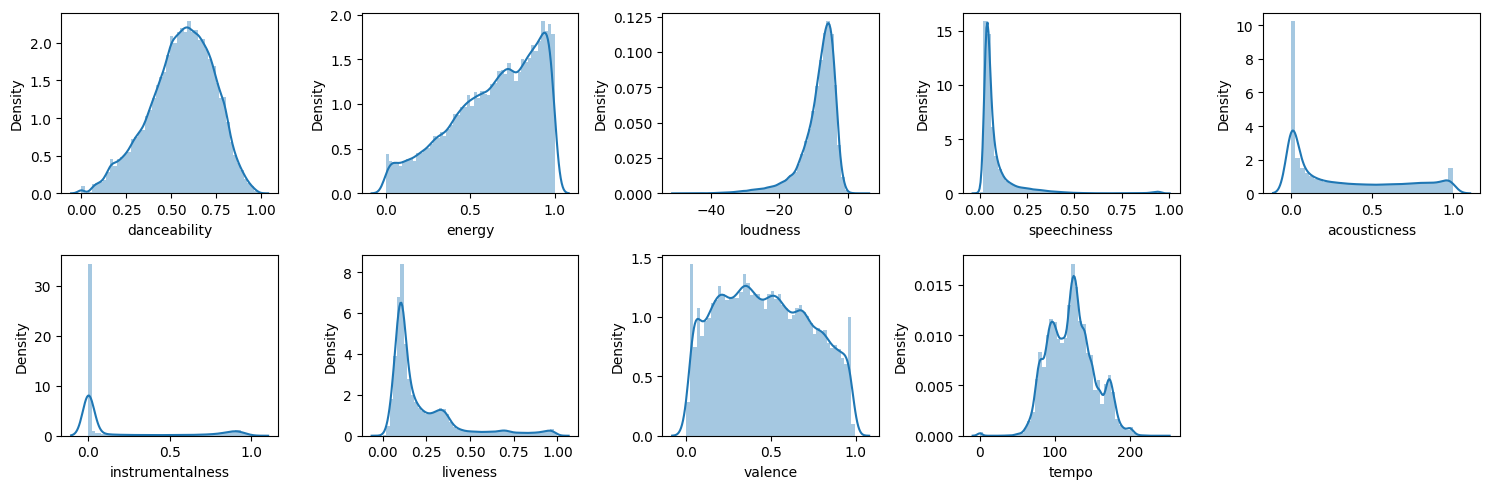

In [37]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
    plt.subplot(2, 5, i + 1)
    sb.distplot(tracks[col])
plt.tight_layout()
plt.show()


In [39]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['track_genre'])


In [40]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)

In [47]:
def get_similarities(song_name, data, song_vectorizer):
    text_array1 = song_vectorizer.transform(data[data['track_name'] == song_name]['track_genre']).toarray()
    num_array1 = data[data['track_name'] == song_name].select_dtypes(include=np.number).to_numpy()

    sim = []
    for idx, row in data.iterrows():
        name = row['track_name']

        # Getting vector for current song.
        text_array2 = song_vectorizer.transform(data[data['track_name'] == name]['track_genre']).toarray()
        num_array2 = data[data['track_name'] == name].select_dtypes(include=np.number).to_numpy()

        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)
    return sim

In [49]:
def recommend_songs(song_name, data=tracks):
    # Base case
    if tracks[tracks['track_name'] == song_name].shape[0] == 0:
        print('This song is either not so popular or you have entered invalid_name.\n Some songs you may like:\n')

        for song in data.sample(n=5)['track_name'].values:
            print(song)
        return

    data['similarity_factor'] = get_similarities(song_name, data)

    data.sort_values(by=['similarity_factor', 'popularity'],
                    ascending=[False, False],
                    inplace=True)

    # First song will be the input song itself as the similarity will be highest.
    display(data[['track_name', 'artists']][1:6]) # Corrected slicing to exclude the input song.

In [70]:
tracks.head(50)

,Unnamed: 0,artists,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
20001,20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100,156943,0.714,0.472,2,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.2380,131.121,dance
51664,51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,0.621,0.782,2,-5.548,1,0.0440,0.012500,0.033000,0.2300,0.5500,128.033,hip-hop
89411,89411,Manuel Turizo,La Bachata,98,162637,0.835,0.679,7,-5.329,0,0.0364,0.583000,0.000002,0.2180,0.8500,124.980,reggaeton
81210,81210,David Guetta;Bebe Rexha,I'm Good (Blue),98,175238,0.561,0.965,7,-3.673,0,0.0343,0.003830,0.000007,0.3710,0.3040,128.040,pop
68304,68304,Bad Bunny,Tití Me Preguntó,97,243716,0.650,0.715,5,-5.198,0,0.2530,0.099300,0.000291,0.1260,0.1870,106.672,latino
68305,68305,Bad Bunny;Chencho Corleone,Me Porto Bonito,97,178567,0.911,0.712,1,-5.105,0,0.0817,0.090100,0.000027,0.0933,0.4250,92.005,latino
68359,68359,Bad Bunny,Efecto,96,213061,0.801,0.475,7,-8.797,0,0.0516,0.141000,0.000017,0.0639,0.2340,98.047,latino
81174,81174,OneRepublic,I Ain't Worried,96,148485,0.704,0.797,0,-5.927,1,0.0475,0.082600,0.000745,0.0546,0.8250,139.994,pop
20000,20000,Chris Brown,Under The Influence,96,184613,0.733,0.690,9,-5.529,0,0.0427,0.063500,0.000001,0.1050,0.3100,116.992,dance
68353,68353,Bad Bunny;Bomba Estéreo,Ojitos Lindos,95,258298,0.647,0.686,3,-5.745,0,0.0413,0.080000,0.000001,0.5280,0.2680,79.928,latino


In [73]:
recommend_songs("BILLIE EILISH. ")

TypeError: get_similarities() missing 1 required positional argument: 'song_vectorizer'

In [68]:
recommend_songs("Quevedo: Bzrp Music Sessions, Vol. 52	")

This song is either not so popular or you have entered invalid_name.
 Some songs you may like:

Last
The Way I Love You
Doobey
Good Golly, Miss Molly
Goodness of God - Live
